# GROUP 03 - DATAPATH

**GROUP 3 - Python Project**:
*   Eben Ezer Sitinjak
*   Paskah Riverdi Manurung
*   Delina Kezia
*   Muhammad Farhan Firdaus
*   Shafira Naya Aprisadianti
*   Florean Alexander
*   Ni Putu Putri Marinda
*   Muhammad Farrel Savero

# Setting Up Workspace

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Google Colab/DataPath

/content/gdrive/MyDrive/Google Colab/DataPath


In [ ]:
import pandas as pd
import numpy as np
import re
import folium

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('Uncleaned_DS_jobs.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


**Missing Value Characteristic for Each Column**

*  Rating: -1 (int)
*  Headquarters: -1 (string)
*  Size: -1, Unknown (string)
*  Founded: -1 (int)
*  Type of ownership:  -1, Unknown (string)
*  Industry: -1 (string)
*  Sector: -1 (string)
*  Revenue: -1, Unknown / Non-Applicable (string)
*  Competitors: -1 (string)



In [ ]:
#Calculating Number of Missing Value Percentage for Each State

rating_ptg = (len(df[df['Rating'] == -1]) / len(df)) * 100
headquarters_ptg = (len(df[df['Headquarters'] == '-1']) / len(df) * 100)
size_ptg = (len(df[df['Size'].isin(['-1', 'Unknown'])]) / len(df) *100)
founded_ptg = (len(df[df['Founded'] == -1]) / len(df)) * 100
type_of_ownership_ptg = (len(df[df['Type of ownership'].isin(['-1', 'Unknown'])]) / len(df) *100)
industry_ptg = (len(df[df['Industry'] == '-1']) / len(df) * 100)
sector_ptg = (len(df[df['Sector'] == '-1']) / len(df) * 100)
revenue_ptg = (len(df[df['Revenue'].isin(['-1', 'Unknown / Non-Applicable'])]) / len(df) *100)
competitors_ptg = (len(df[df['Competitors'] == '-1']) / len(df) * 100)
ptg = {'rating':rating_ptg, 'headquarters':headquarters_ptg, 'size':size_ptg, 'founded':founded_ptg, 'type of ownership':type_of_ownership_ptg, 'industry':industry_ptg, 'sector':sector_ptg, 'revenue':revenue_ptg, 'competitors':competitors_ptg}

for key,value in ptg.items():
  print(key + ' : ' + str(value))

rating : 7.440476190476191
headquarters : 4.613095238095238
size : 6.547619047619048
founded : 17.559523809523807
type of ownership : 4.613095238095238
industry : 10.56547619047619
sector : 10.56547619047619
revenue : 35.714285714285715
competitors : 74.55357142857143


In [ ]:
#Drop Column with Number of Missing Value Percentage more than 35%
df = df.drop(columns=['index', 'Revenue', 'Competitors'])

**Variable Type for Each Column**

*  Rating: -1 (int)
*  Headquarters: -1 (string)
*  Size: -1, Unknown (string)
*  Founded: -1 (int)
*  Type of ownership:  -1, Unknown (string)
*  Industry: -1 (string)
*  Sector: -1 (string)



In [ ]:
#Column
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector'],
      dtype='object')

# Data Inputation

Input missing value data with mean or mode value for each column 

In [ ]:
#Missing Value Handling

#Rating
rating_avg = df[df['Rating']!= -1]['Rating'].mean()
df['Rating'] = df['Rating'].apply(lambda x: rating_avg if x==-1 else x)

#Headquarters
hq_mode = df[df['Headquarters']!= '-1']['Headquarters'].mode()[0]
df['Headquarters'] = df['Headquarters'].apply(lambda x: hq_mode if x=='-1' else x)

#Size
size_mode = df[~df['Size'].isin(['-1', 'Unknown'])]['Size'].mode()[0]
df['Size'] = df['Size'].apply(lambda x: size_mode if x in ['-1', 'Unknown'] else x)

#Founded
founded_mode = df[df['Founded']!= -1]['Founded'].mode()[0]
df['Founded'] = df['Founded'].apply(lambda x: founded_mode if x==-1 else x)

#Type of Ownership
owner_type_mode = df[~df['Type of ownership'].isin(['-1', 'Unknown'])]['Type of ownership'].mode()[0]
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: owner_type_mode if x in ['-1', 'Unknown'] else x)

#Industry
industry_mode = df[df['Industry']!= '-1']['Industry'].mode()[0]
df['Industry'] = df['Industry'].apply(lambda x: industry_mode if x in ['-1', 'Unknown'] else x)

#Sector
sector_mode = df[df['Sector']!= '-1']['Sector'].mode()[0]
df['Sector'] = df['Sector'].apply(lambda x: sector_mode if x in ['-1', 'Unknown'] else x)

In [ ]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services


**Duplicate Row Checking**

If percentage is less than 1, it means there is a duplicate row, then it should be taken out.

In [ ]:
#Checking Duplicate Row Percentage

len(df.drop_duplicates()) / len(df)

0.9806547619047619

In [ ]:
#Since less than 1, it should be taken out

df = df.drop_duplicates()

In [ ]:
#Checking it back

len(df.drop_duplicates()) / len(df)

1.0

# Job Title Cleaning

In [ ]:
df['Job Title'].value_counts().head(50)

Data Scientist                                                                                      326
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            15
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Data Science Software Engineer                                                                        4
Senior Data Engineer                                                                                  4
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Data Scientist - TS/SCI FSP or CI Required                      

In [ ]:
df['Job Title'].value_counts().tail(50)

Geospatial Data Scientist                                                                   1
Information Systems Engineering Specialist (Engineering Scientist)                          1
Lead Data Scientist – Network Analysis and Control                                          1
Statistical Scientist                                                                       1
Data Scientist Machine Learning                                                             1
Business Intelligence Analyst I- Data Insights                                              1
Global Data Analyst                                                                         1
Developer III - Data Science                                                                1
Manager, Field Application Scientist, Southeast                                             1
Say Business Data Analyst                                                                   1
Staff Data Scientist - Pricing                              

In [ ]:
def clean_job_title(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'machine learning engineer' in x.lower():
        return 'ml engineer'
    elif 'data analyst' in x.lower():
        return 'data analyst'
    elif 'machine learning scientist' in x.lower():
        return 'ml scientist'
    elif 'business intelligence' in x.lower():
        return 'business intelligence'
    elif 'research scientist' in x.lower():
        return 'research scientist'
    elif 'data science manager' in x.lower():
        return 'data science manager'
    else:
        return 'others'

df['Job Title'] = df['Job Title'].apply(clean_job_title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['Job Title'].value_counts()

data scientist           444
others                    79
data analyst              47
data engineer             46
ml engineer               20
ml scientist              11
business intelligence      6
research scientist         4
data science manager       2
Name: Job Title, dtype: int64

# Salary Estimate Mean

In [ ]:
df['Salary Estimate'].value_counts().head(50)

$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$79K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     28
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$56K-$97K (Glassdoor est.)      22
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$69K-$116K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$124K-$198K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$112K-$116K (Glassdoor est.)    21
$145K-$225K(Employer est.)      20
$31K-$56K (Glassdoor est.)      20
$79K-$147K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$110K-$163K (Glassdoor est.)    20
$80K-$132K (Glassdoor est.)     20
$66K-$112K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$141K-$225K (Glassdoor est.)    20
$71K-$123K (Glassdoor est.)     19
$79K-$133K (Glassdoor est.)     19
$122K-$146K (Glassdo

In [ ]:
def get_mean_salary(txt):
  number = re.findall(r'[0-9]+', txt)
  number = [int(x) for x in number]
  return np.mean(number)

In [ ]:
def get_mean_salary_1(txt):
  number = re.findall(r'[0-9]+', txt)
  for x in number: 
    numbers = int(x)
    return np.mean(numbers)

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(get_mean_salary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Company Name Cleaning

In [ ]:
df['Company Name']

0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: Company Name, Length: 659, dtype: object

In [ ]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 659, dtype: object

# Final Cleaned Data

In [ ]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,data scientist,154.0,Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,data scientist,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,data scientist,136.0,Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
670,data scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services


# Data Manipulation

Company State

In [ ]:
state_codes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

def get_state(loc,hq):
  # extract state code dari column Location
  extracted_code = loc[-2:]
  # kalo extracted code nya lowercase, benerin dulu
  if not extracted_code in state_codes:
    if extracted_code == 'ah': # Utah
      code = 'UT'
    elif extracted_code == 'as': # Texas
      code = 'TX'
    elif extracted_code == 'ey': # New Jersey
      code = 'NJ'
    elif extracted_code == 'ia': # California
      code = 'CA'
    elif extracted_code == 'te': # Remote
      code = "Remote"
    elif extracted_code == 'DC': # Washington DC
      code = "WA"
    elif extracted_code == 'es':
      code = "United States"
  else:
      code = extracted_code
  # kalo "Remote" sama "United States", extract state code nya dari Headquarters
  extracted_hq = hq[-2:]
  if code == "United States" or code == "Remote":
    if not extracted_hq in state_codes:
      if extracted_hq == 'DC':
        code = 'WA'
    else:
      code = extracted_hq
  return code

df['State'] = df.apply(lambda x: get_state(x['Location'],x['Headquarters']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['State'].value_counts()

CA               159
VA                94
MA                62
NY                52
WA                45
MD                40
IL                30
TX                18
OH                14
MO                12
PA                12
NJ                12
CO                10
GA                 9
NC                 9
TN                 8
FL                 8
WI                 6
OK                 6
MI                 6
IN                 5
AZ                 5
CT                 5
UT                 4
AL                 4
MN                 4
IA                 3
NE                 3
NH                 2
SC                 2
RI                 2
OR                 2
WV                 1
LA                 1
MS                 1
United States      1
KS                 1
DE                 1
Name: State, dtype: int64

Workload

In [ ]:
df['Workload'] = df['Job Title'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Needed Skills

In [ ]:
df['python_needed'] = df['Job Description'].str.lower().str.contains('python')
df['excel_needed'] = df['Job Description'].str.lower().str.contains('excel')
df['hadoop_needed'] = df['Job Description'].str.lower().str.contains('hadoop')
df['spark_needed'] = df['Job Description'].str.lower().str.contains('spark')
df['tableau_needed'] = df['Job Description'].str.lower().str.contains('tableau')
df['big_data_needed'] = df['Job Description'].str.lower().str.contains('big data')
df['deep_learning_needed'] = df['Job Description'].str.lower().str.contains('deep learning')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
def need_python(x):
  if x == True:
    return 1
  else:
    return 0

In [ ]:
df['python_needed'] = df['python_needed'].apply(need_python)
df['excel_needed'] = df['excel_needed'].apply(need_python)
df['hadoop_needed'] = df['hadoop_needed'].apply(need_python)
df['spark_needed'] = df['spark_needed'].apply(need_python)
df['tableau_needed'] = df['tableau_needed'].apply(need_python)
df['big_data_needed'] = df['big_data_needed'].apply(need_python)
df['deep_learning_needed'] = df['deep_learning_needed'].apply(need_python)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['skills_needed'] = df['python_needed'] + df['excel_needed'] + df['hadoop_needed'] + df['spark_needed'] + df['tableau_needed'] + df['big_data_needed'] + df['deep_learning_needed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,State,Workload,python_needed,excel_needed,hadoop_needed,spark_needed,tableau_needed,big_data_needed,deep_learning_needed,skills_needed
0,data scientist,154.0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,NY,14,0,0,0,0,0,0,0,0
1,data scientist,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,VA,14,0,0,1,0,0,1,0,2
2,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,MA,14,1,1,0,0,0,0,0,2
3,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,MA,14,1,1,0,0,0,0,1,3
4,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,NY,14,1,1,0,0,0,0,0,2


# Gaining Insights

## Relation between Each of skills needed and State

**Basic Insight**

In [ ]:
python_mean = df['python_needed'].mean()

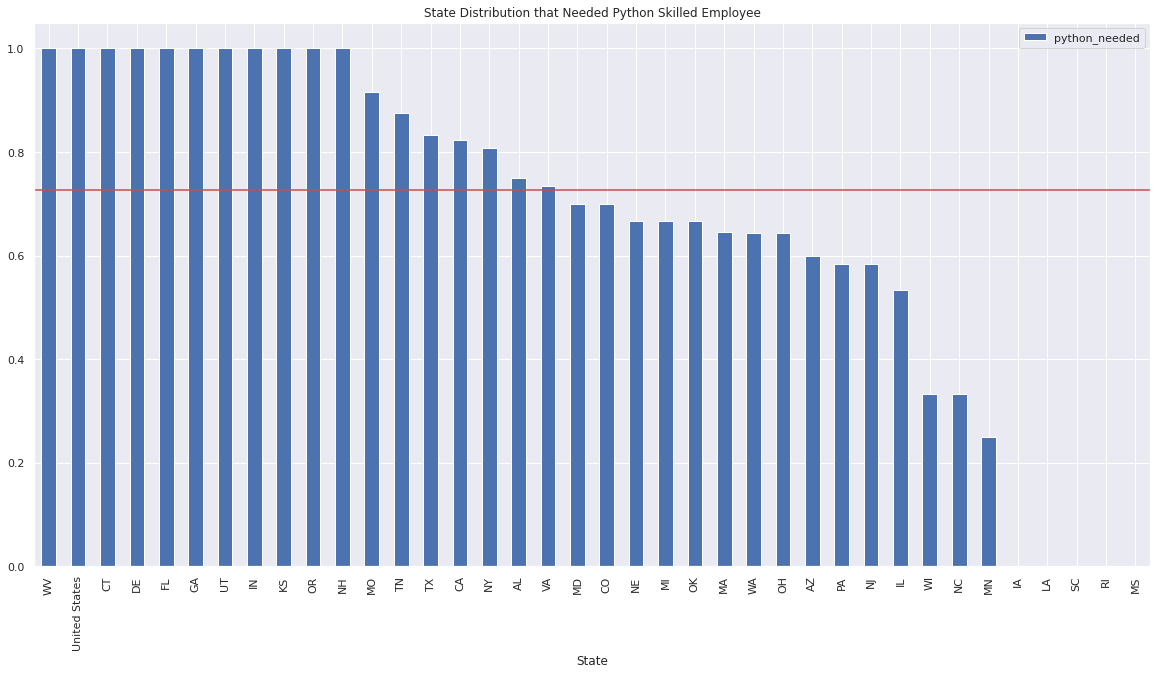

In [ ]:
#Python
df.groupby(['State'])[['python_needed']].mean().sort_values(['python_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Python Skilled Employee')
plt.axhline(python_mean, color = 'r')
plt.show()

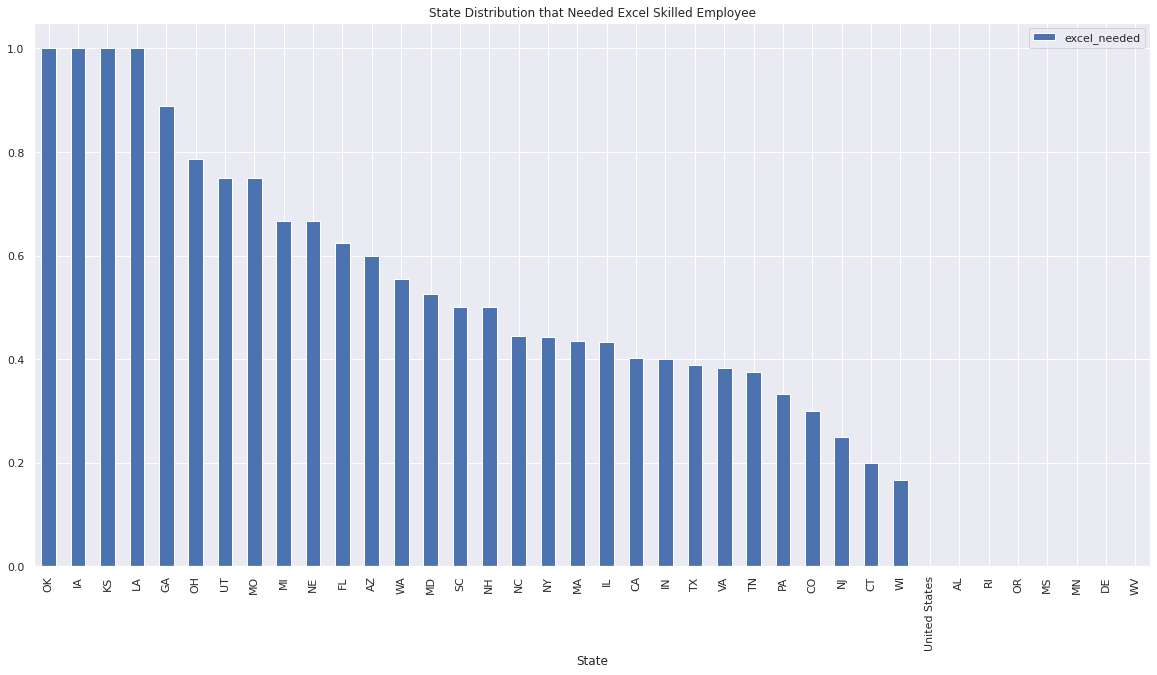

In [ ]:
#Excel
df.groupby(['State'])[['excel_needed']].mean().sort_values(['excel_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Excel Skilled Employee')
plt.show()

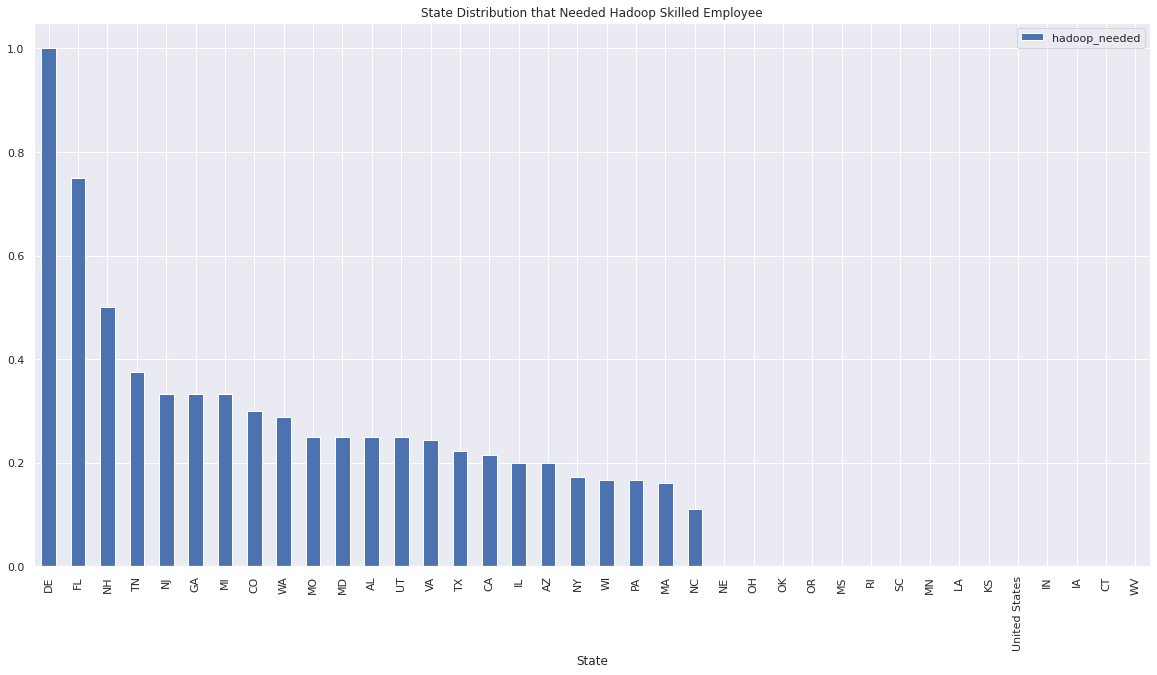

In [ ]:
#Hadoop
df.groupby(['State'])[['hadoop_needed']].mean().sort_values(['hadoop_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Hadoop Skilled Employee')
plt.show()

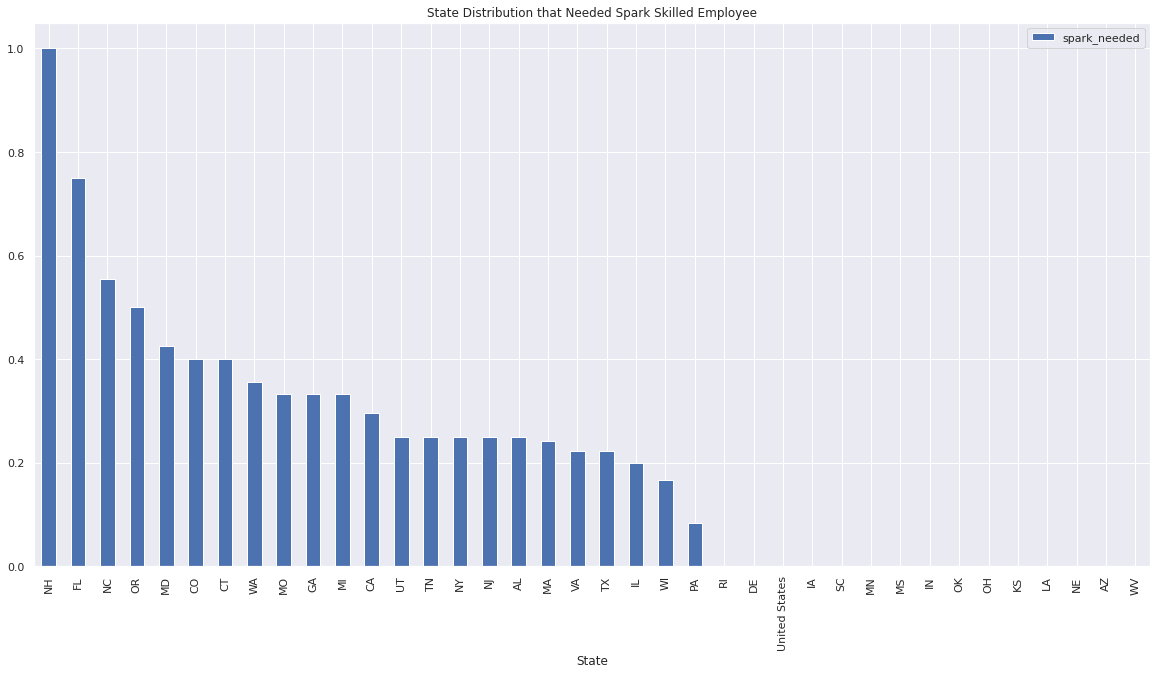

In [ ]:
#Spark
df.groupby(['State'])[['spark_needed']].mean().sort_values(['spark_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Spark Skilled Employee')
plt.show()

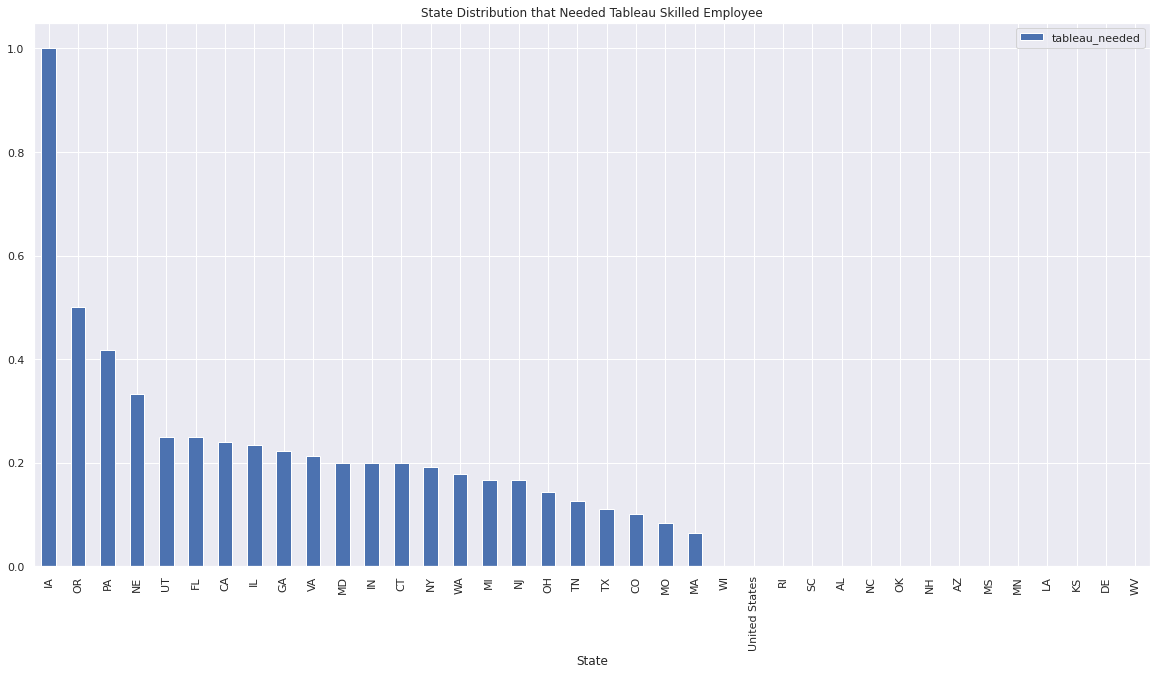

In [ ]:
#Tableau
df.groupby(['State'])[['tableau_needed']].mean().sort_values(['tableau_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Tableau Skilled Employee')
plt.show()

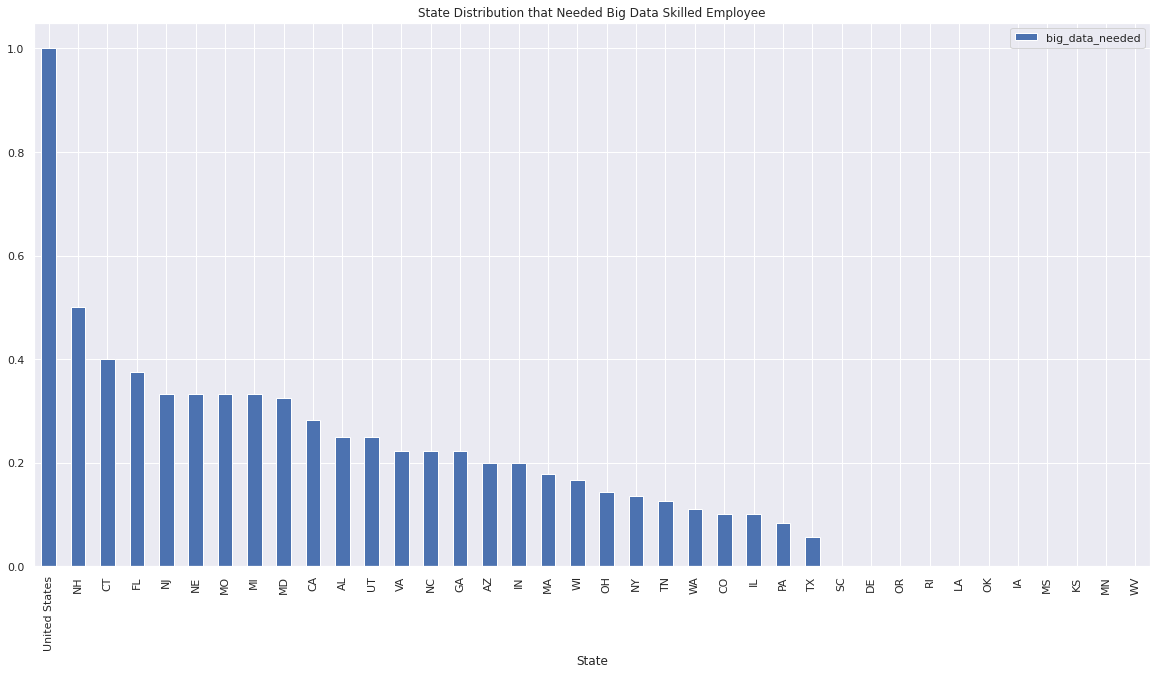

In [ ]:
#Big Data
df.groupby(['State'])[['big_data_needed']].mean().sort_values(['big_data_needed'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution that Needed Big Data Skilled Employee')
plt.show()

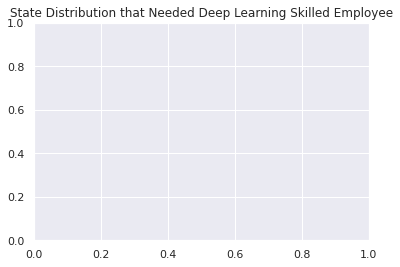

In [ ]:
#Deep Learning
df.groupby(['State'])[['deep_learning_needed']].mean().sort_values(['deep_learning_needed'], ascending=False)
plt.title('State Distribution that Needed Deep Learning Skilled Employee')
plt.show()

**1 - Distribution Analysis**

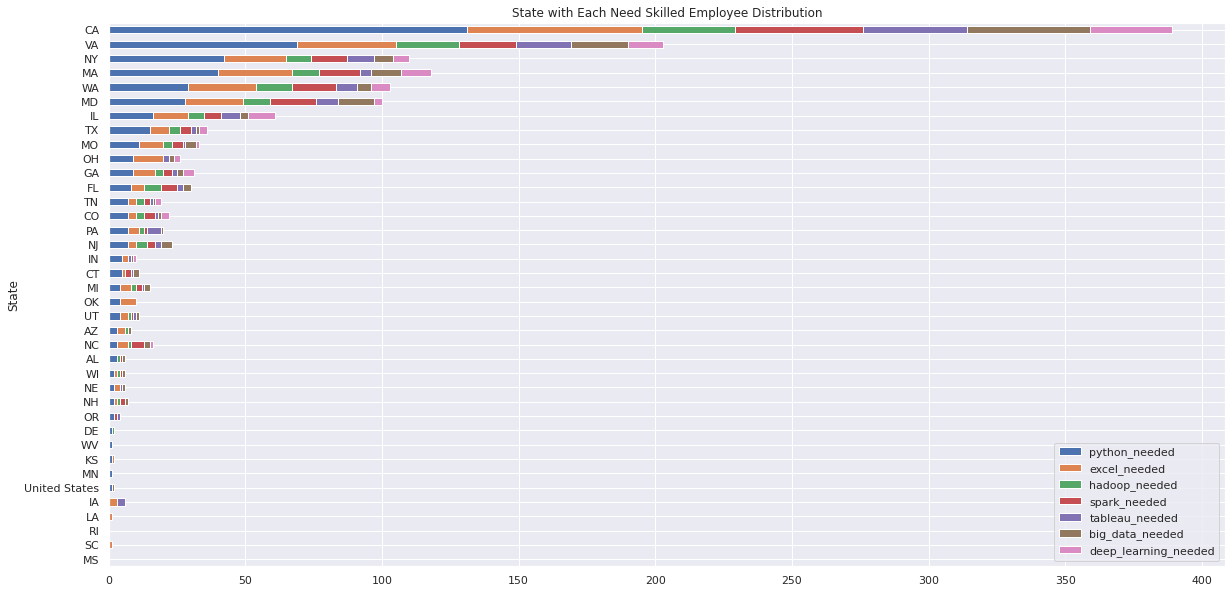

In [ ]:
#Skill Needed Comparison for Each State
df.groupby(['State'])[['python_needed', 'excel_needed', 'hadoop_needed', 'spark_needed', 'tableau_needed', 'big_data_needed', 'deep_learning_needed']].sum().sort_values(['python_needed'], ascending=True)\
                                                                                                                                                      .plot(kind='barh', stacked=True, figsize=(20,10))
plt.title('State with Each Need Skilled Employee Distribution')
plt.show()

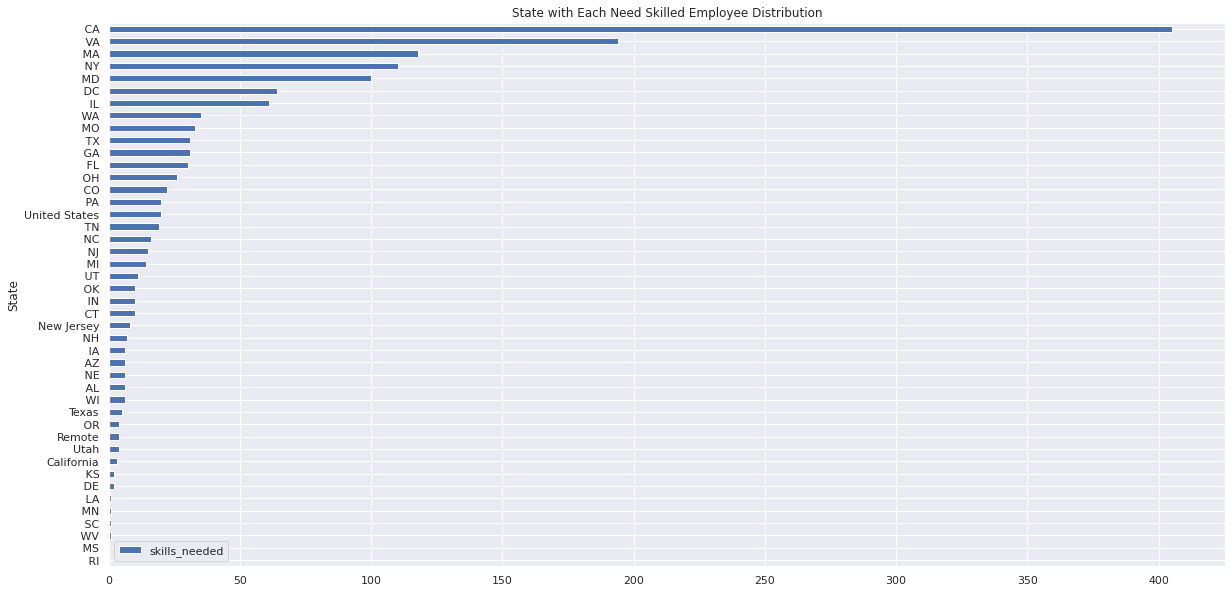

In [ ]:
#Skill Needed Comparison for Each State
df.groupby(['State'])[['skills_needed']].sum().sort_values(['skills_needed'], ascending=True).plot(kind='barh', figsize=(20,10))
plt.title('State with Each Need Skilled Employee Distribution')
plt.show()

TOP 5 - States that need many skills



1.   CA
2.   VA
3.   NY
4.   MA
5.   WA



**2 - Relationship between `Skills` and `Job Title`**

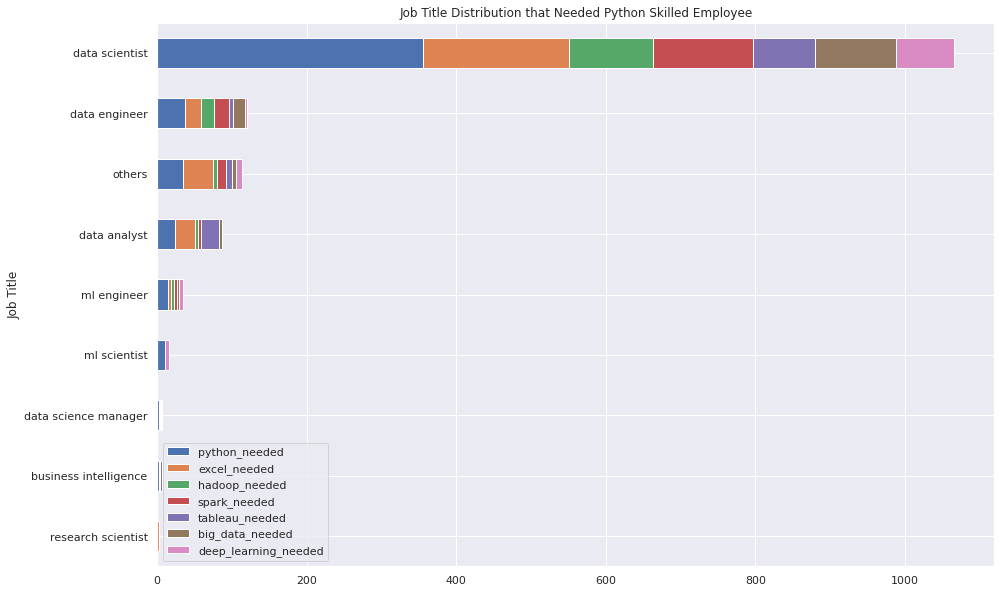

In [ ]:
#Distribution
df.groupby(['Job Title'])[['python_needed', 'excel_needed', 'hadoop_needed', 'spark_needed', 'tableau_needed', 'big_data_needed', 'deep_learning_needed']].sum().sort_values(['python_needed'], ascending=True).plot(kind='barh', stacked=True, figsize=(15,10))
plt.title('Job Title Distribution that Needed Python Skilled Employee')
plt.show()


Almost all job types need **Python skill** with **data scientist** become the job that need many skills

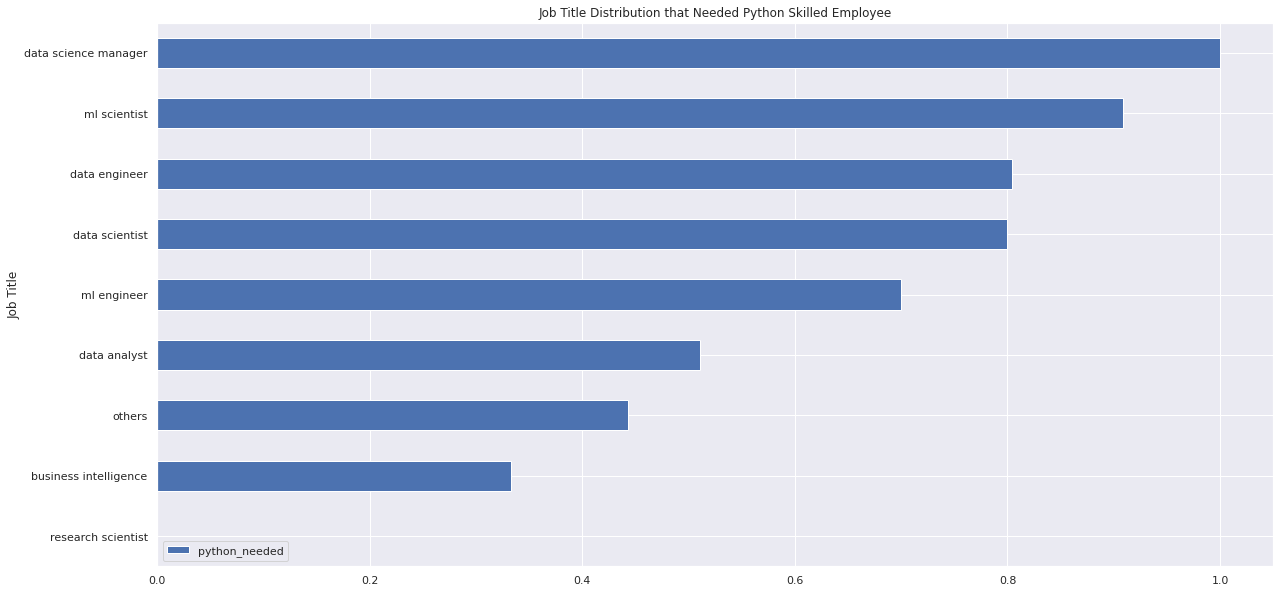

In [ ]:
#Python
df.groupby(['Job Title'])[['python_needed']].mean().sort_values(['python_needed'], ascending=True).plot(kind='barh', figsize=(20,10))
plt.title('Job Title Distribution that Needed Python Skilled Employee')
plt.show()

**3 - Relationship between `Python Needed Skills` and `Salary`**

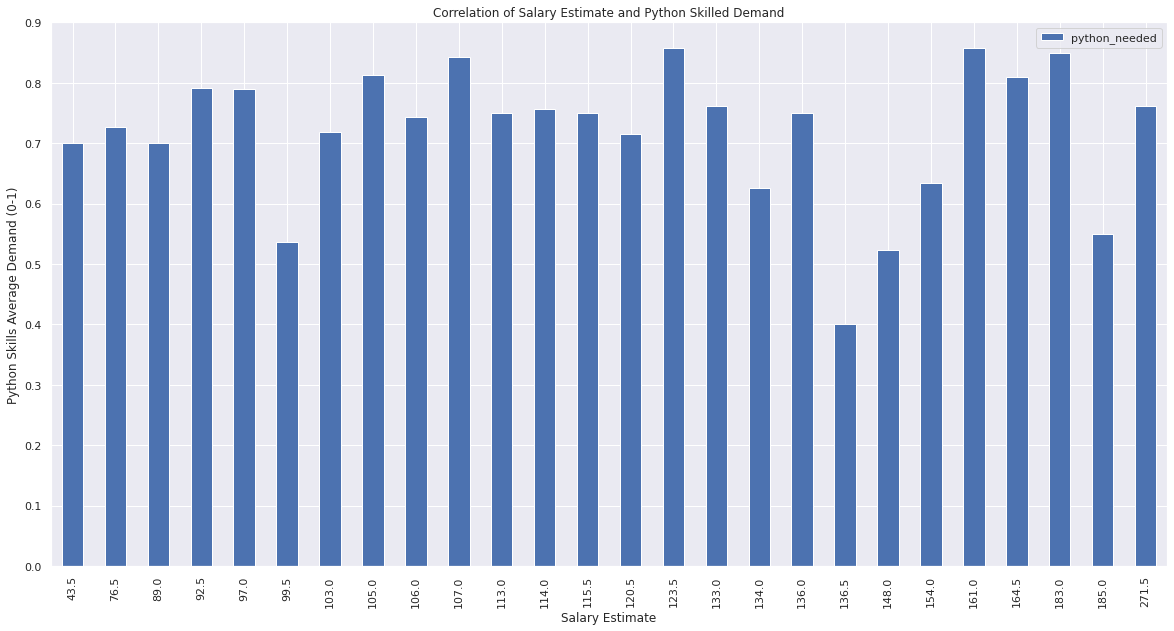

In [ ]:
#Python
df.groupby(['Salary Estimate'])[['python_needed']].mean().sort_values(['Salary Estimate'], ascending=True).plot(kind='bar', figsize=(20,10))
plt.title('Correlation of Salary Estimate and Python Skilled Demand')
plt.xlabel('Salary Estimate')
plt.ylabel('Python Skills Average Demand (0-1)')
plt.show()

However, even though Python become the most needed skill, it doesn't mean you will get high salary if you master Python. **High Salary depends on the job, not because you master Python**

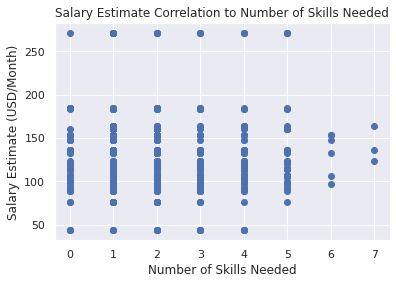

In [ ]:
#Salary - Skills Accumulative (Rel)
plt.scatter(df['skills_needed'], df['Salary Estimate'])
plt.title('Salary Estimate Correlation to Number of Skills Needed')
plt.xlabel('Number of Skills Needed')
plt.ylabel('Salary Estimate (USD/Month)')
plt.show()

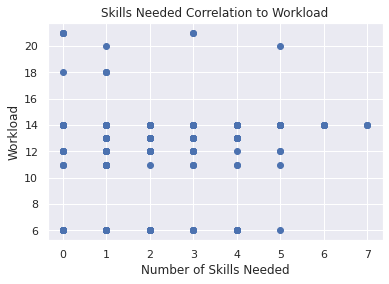

In [ ]:
#Workload - Skills Accumulative (Rel)
plt.scatter(df['skills_needed'], df['Workload'])
plt.title('Skills Needed Correlation to Workload')
plt.xlabel('Number of Skills Needed')
plt.ylabel('Workload')
plt.show()

Number of skills needed also have not relationship with how many salary and workload you will get

## Relation between Salary and State

**1 - State Distribution Based on Salary**



In [ ]:
salary_mean = df['Salary Estimate'].mean()

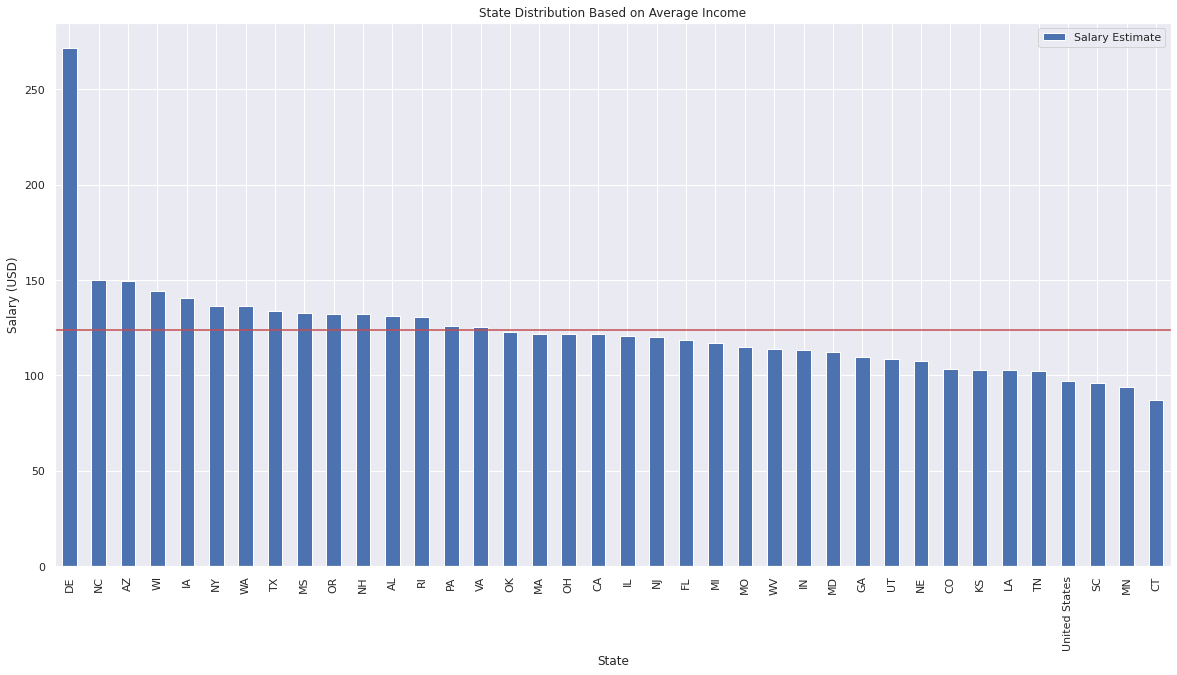

In [ ]:
df.groupby(['State'])[['Salary Estimate']].mean().sort_values(['Salary Estimate'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution Based on Average Income')
plt.xlabel('State')
plt.ylabel('Salary (USD)')
plt.axhline(salary_mean, color = 'r')
plt.show()

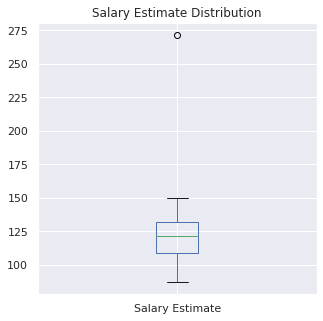

In [ ]:
state_workload = df.groupby(['State'])[['Salary Estimate']].mean().sort_values(['Salary Estimate'], ascending=False)
state_workload['Salary Estimate'].plot(kind='box', figsize=(5,5))
plt.title('Salary Estimate Distribution')
plt.show()

Salary for each state has a fairly good distribution with only one outliers with significantly high. It means that each state has the same salary standard, except DE.

Biggest Salary: DE

Lowest Salary: CT, MN

**2 - Salary Estimate Correlation to Workload**

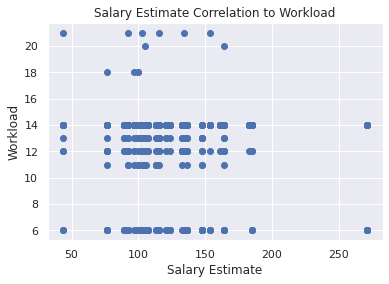

In [ ]:
plt.scatter(df['Salary Estimate'], df['Workload'])
plt.title('Salary Estimate Correlation to Workload')
plt.xlabel('Salary Estimate')
plt.ylabel('Workload')
plt.show()

High Work Load doesn't mean high salary, as you can see from the graph there is a plot where even though 1 plot has only 6 work load, the salary reach up to $250K

## Relation between Workload and State

**1 - Workload Distribution**

In [ ]:
workload_mean = df['Workload'].mean()

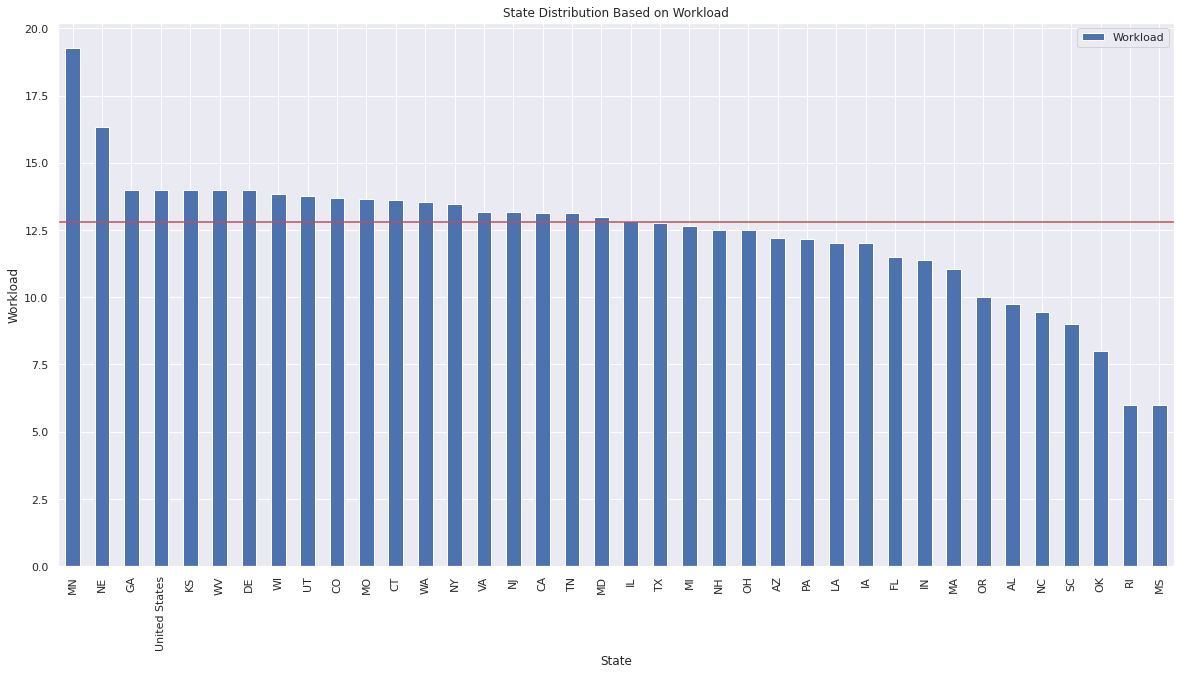

In [ ]:
df.groupby(['State'])[['Workload']].mean().sort_values(['Workload'], ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('State Distribution Based on Workload')
plt.xlabel('State')
plt.ylabel('Workload')
plt.axhline(workload_mean, color = 'r')
plt.show()

Workload dibawah rata-rata: IL, TX, MI, NH, OH, AZ, PA, LA, IA, FL, IN, MA, OR, AL, NC, SC, OK, RI, MS




In [ ]:
df['Workload'].mean()

12.810318664643399

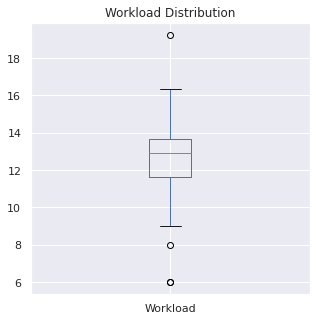

In [ ]:
state_workload = df.groupby(['State'])[['Workload']].mean().sort_values(['Workload'], ascending=False)
state_workload['Workload'].plot(kind='box', figsize=(5,5))
plt.title('Workload Distribution')
plt.show()

Compared to salary distribution, workload distribution has worse distribution, with several outliers that is significantly high and low 

Biggest Workload: MN

Lowest Workload: MS

One of the unique cases can also be seen when comparing the distribution of salary and workload that State MN has the largest workload, but the salary given is the second  smallest.

**2 - Relationship Salary - Workload [Group by State]**

It can also be proven if we develop relationship which is grouped by States which shows the regression results that the larger the workload, the smaller the salary. Although R-squared is not very large, this indicates that some states provide salaries that are not commensurate with the workload.

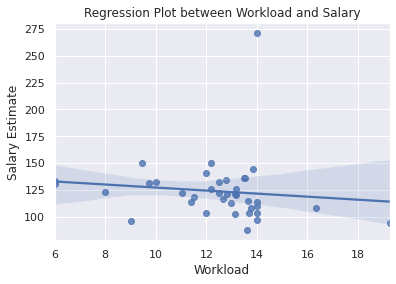

In [ ]:
data = df.groupby(['State'])[['Salary Estimate', 'Workload']].mean().sort_values(['Salary Estimate'], ascending=False)
df_gabungan = pd.DataFrame(data)
sns.regplot(data=df_gabungan, x='Workload', y='Salary Estimate')
plt.title('Regression Plot between Workload and Salary')
plt.show()

## State with High Demand of Jobs

In [ ]:
m1 = folium.Map(location=[39.87563143595726, -97.01093862521543],tiles='cartodbpositron',zoom_start=4)

folium.Marker(location=[34.611684867898404, -118.30454276138323],popup='California',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='red',icon='none')).add_to(m1)
folium.Marker(location=[38.97183231771575, -77.3833301533048],popup='Virginia',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(m1)
folium.Marker(location=[40.67691288692063, -73.9124395663061],popup='New York',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='green',icon='none')).add_to(m1)
folium.Marker(location=[42.269951181001694, -71.20029177543978],popup='Massachusetts',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='black',icon='none')).add_to(m1)
folium.Marker(location=[39.25348033225148, -76.90903514906522],popup='Maryland',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='gray',icon='none')).add_to(m1)

In [ ]:
m1

**Additional Insight**

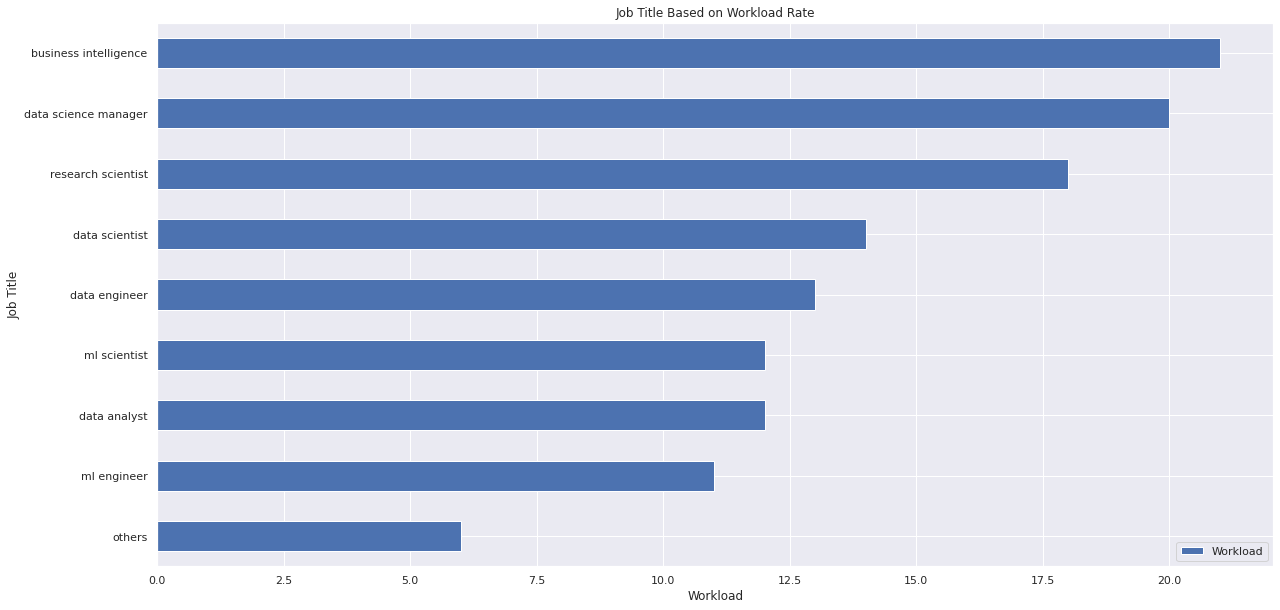

In [ ]:
df.groupby(['Job Title'])[['Workload']].mean().sort_values(['Workload'], ascending=True).plot(kind='barh', figsize=(20,10))
plt.title('Job Title Based on Workload Rate')
plt.xlabel('Workload')
plt.ylabel('Job Title')
plt.show()

In [ ]:
df.pivot_table(index=['State'], columns=['Sector'], values=['skills_needed']).head()

skills_needed  ...                 
Sector Accounting & Legal  ... Travel & Tourism
State                      ...                 
AL                    NaN  ...              NaN
AZ                    NaN  ...              NaN
CA                    NaN  ...              NaN
CO                    NaN  ...              1.0
CT                    NaN  ...              NaN

[5 rows x 22 columns]

Salary - Job Title (Cat)

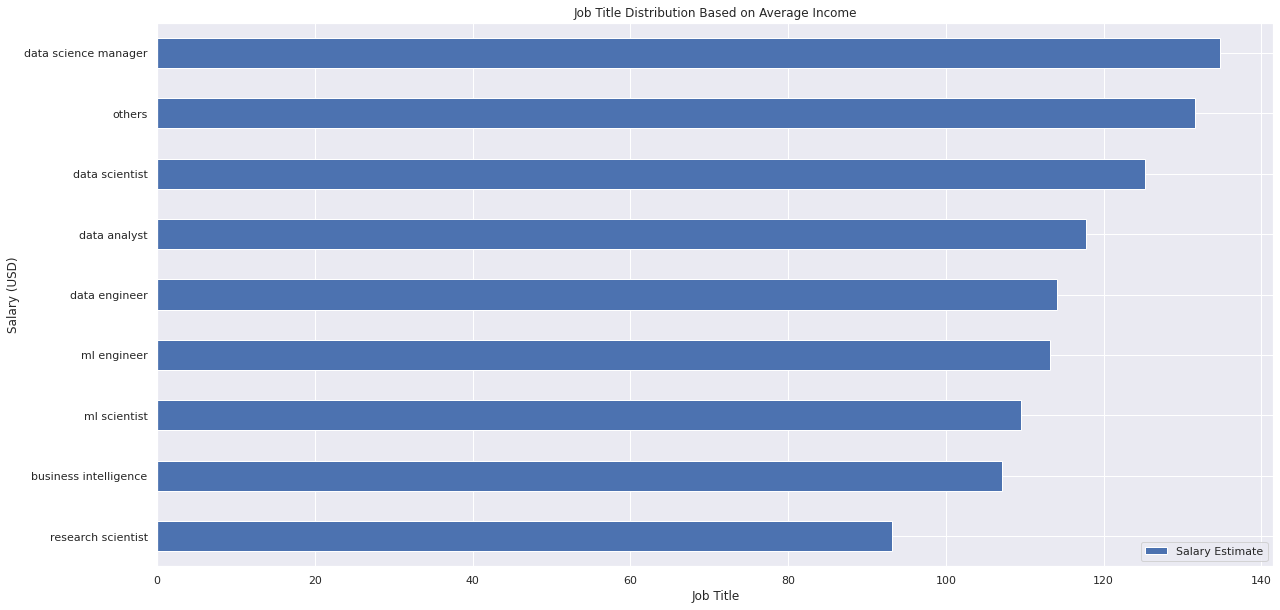

In [ ]:
df.groupby(['Job Title'])[['Salary Estimate']].mean().sort_values(['Salary Estimate'], ascending=True).plot(kind='barh', figsize=(20,10))
plt.title('Job Title Distribution Based on Average Income')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.show()

# Conclusion

Conclusion:

*   In each state, phyton is the most needed skill. However, it doesn't guarantee you to get high salary.
*   We obtained that even though the workload is high, it does not mean that the salary will be high. This can be seen from the condition of MN and scatter plot in slide 3.
*   In United States, there are indications that most of the states provide salaries which are not commensurate with the workload.
*   California, Virginia, Maryland, New York, and Massachusetts become the highest job demand and most varied skill *needed*


Recommendation:


*   Seeing the current skills that are most needed based on the distribution of each state and job title which is python, so it is better for new graduates in the United States who want a career in the High Tech industry to prepare this skill before graduating.
*   New York become the most recommended state since it has high job demand in United State and provide high salary 
